# Setup CoLab environment

In [ ]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change output font size
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 10px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

# Import libraries

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from time import time
%matplotlib inline
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
pd.set_option('display.precision',0)
# pd.reset_option('display.max.columns')
pd.reset_option('display.max.rows')

# Question


1. 預測新電影的票房是否會成功
2. 電影成功的主要因素
3. 獲取收入超過2百萬美元且支出少於1百萬美元的電影



# Prepare: load file

In [ ]:
# Load the IMDb dataset
target_csv_path = Path.cwd() / 'drive' / 'MyDrive' / '資料分析案例實作' / 'movie' / 'movie_metadata.csv'
movie_df = pd.read_csv(target_csv_path)

# Process

## 了解資料集結構 Understand Dataset

In [ ]:
movie_df

In [ ]:
movie_df.columns

In [ ]:
movie_df.head()
movie_df.head().T

## Movie_df 欄位名稱及描述

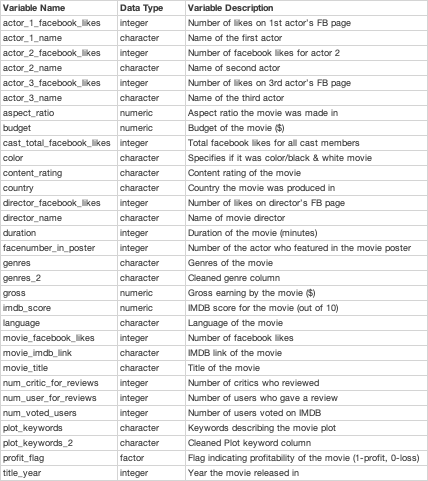

## 基本統計 Basic statistics

In [ ]:
movie_df.info()

In [ ]:
movie_df.describe(include=object) #non-number column
# movie_df.describe() #numeric column

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


## 資料清洗 Data cleaning

In [ ]:
# 移除完全重複的列
movie_df.duplicated()
movie_df[movie_df.duplicated(keep=False)]
movie_df.drop_duplicates(inplace=True)
# 移除movie_title重複的列
movie_df.drop_duplicates('movie_title', inplace=True)
# 移除任何空值的列
movie_df.isna().sum()
movie_df.dropna(how='any', inplace=True)
movie_df.head(10)
# # movie.fillna(0, inplace=True)
# # movie.drop('genres', axis=1, inplace=True)
movie_df.corr()
# # movie.index
# # movie.columns
# #df = pd.DataFrame(columns = ('genres', 'avg_score'))  # create a new df
# movie_df.shape

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1e+00,2e-01,2e-01,2e-01,2e-01,5e-01,6e-01,2e-01,-3e-02,6e-01,2e-01,4e-01,3e-01,4e-01,2e-01,7e-01
duration,2e-01,1e+00,2e-01,1e-01,8e-02,2e-01,3e-01,1e-01,3e-02,3e-01,1e-01,-1e-01,1e-01,4e-01,2e-01,2e-01
director_facebook_likes,2e-01,2e-01,1e+00,1e-01,9e-02,1e-01,3e-01,1e-01,-5e-02,2e-01,4e-02,-5e-02,1e-01,2e-01,4e-02,2e-01
actor_3_facebook_likes,2e-01,1e-01,1e-01,1e+00,2e-01,3e-01,3e-01,5e-01,1e-01,2e-01,9e-02,1e-01,5e-01,7e-02,5e-02,3e-01
actor_1_facebook_likes,2e-01,8e-02,9e-02,2e-01,1e+00,1e-01,2e-01,9e-01,6e-02,1e-01,4e-02,9e-02,4e-01,9e-02,6e-02,1e-01
gross,5e-01,2e-01,1e-01,3e-01,1e-01,1e+00,6e-01,2e-01,-3e-02,5e-01,2e-01,5e-02,2e-01,2e-01,6e-02,4e-01
num_voted_users,6e-01,3e-01,3e-01,3e-01,2e-01,6e-01,1e+00,2e-01,-3e-02,8e-01,1e-01,2e-02,2e-01,5e-01,8e-02,5e-01
cast_total_facebook_likes,2e-01,1e-01,1e-01,5e-01,9e-01,2e-01,2e-01,1e+00,8e-02,2e-01,7e-02,1e-01,6e-01,1e-01,7e-02,2e-01
facenumber_in_poster,-3e-02,3e-02,-5e-02,1e-01,6e-02,-3e-02,-3e-02,8e-02,1e+00,-8e-02,-3e-02,7e-02,7e-02,-7e-02,2e-02,1e-02
num_user_for_reviews,6e-01,3e-01,2e-01,2e-01,1e-01,5e-01,8e-01,2e-01,-8e-02,1e+00,1e-01,2e-02,2e-01,3e-01,9e-02,4e-01


In [ ]:
df.drop_duplicates(subset=['movie_title'], keep='first').head(1) # 移除重複 by movie_title 留第一行
df_subset=df[['imdb_score','genres']].copy() # copy 'imdb_score','genres' columns to new df

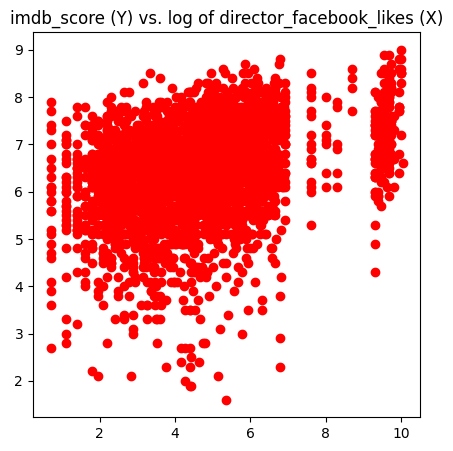

In [ ]:
plt.rcParams["figure.figsize"] = [5,5]
a=np.log(movie_df['director_facebook_likes'])
plt.title('imdb_score (Y) vs. log of director_facebook_likes (X)')
plt.plot(a, movie_df['imdb_score'], 'ro')

In [ ]:
#df_genres.corr().sort_values(['imdb_score'], ascending=False, inplace=False)